# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 10 ปัญหาจำแนกแบบหลายคลาส

In [ ]:
# ตัวอย่าง 9.1
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

segmentation = pd.read_csv('Segmentation.csv')

# Putting feature variable to X, Putting response variable to y
X = segmentation.drop(['CustomerID','Segment'],axis=1)
y = segmentation['Segment']

OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X) 
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

In [ ]:
# ตัวอย่าง 9.2
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support 

segmentation = pd.read_csv('Segmentation.csv')
segmentation.head()
segmentation.info()
segmentation['Segment'].value_counts()

# Putting feature variable to X, Putting response variable to y 
X = segmentation.drop(['CustomerID','Segment'],axis=1) 
y = segmentation['Segment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=123, stratify=y) 

model = DecisionTreeClassifier()
clf = model.fit(X_train,y_train)

# Making predictions
y_pred=clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='macro') 
precision_recall_fscore_support(y_test, y_pred, average='micro')

# Printing classification report
print(classification_report(y_test, y_pred))

In [ ]:
# กิจกรรม 9.1
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt 
import seaborn as sns 

data= pd.read_csv(r'MarketingData.csv')
data.head()
data.shape
data.isnull().values.any()
data.describe()
data['Channel'].value_counts()

target = 'Channel'
X = data.drop(['Channel'],axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.20,
                                                    random_state=123, stratify=y) 

clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
                                    min_samples_split=7, random_state=0)

clf_random.fit(X_train,y_train)

y_pred=clf_random.predict(X_test)

precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_recall_fscore_support(y_test, y_pred, average='micro')

target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm, index = target_names, columns = target_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# ตัวอย่าง 9.3 Imbalanced Data
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns

data =  pd.read_csv('adult.csv')
data.head()

data.replace('?',np.nan,inplace=True)

#Dropping all NULL values
data.dropna(inplace=True)

data['income'].value_counts()

#Encoding the Categorical values to Numericals using LabelEncoder 
from sklearn.preprocessing import LabelEncoder 

Labelenc_workclass = LabelEncoder() 
data['workclass']=Labelenc_workclass.fit_transform(data['workclass'])

Labelenc_education = LabelEncoder() 
data['education']=Labelenc_education.fit_transform(data['education'])

Labelenc_marital_status = LabelEncoder() 
data['marital-status']=Labelenc_marital_status.fit_transform(data['marital-status']) 

Labelenc_occupation = LabelEncoder() 
data['occupation']=Labelenc_occupation.fit_transform(data['occupation']) 

Labelenc_relationship = LabelEncoder() 
data['relationship']=Labelenc_relationship.fit_transform(data['relationship']) 

Labelenc_race = LabelEncoder() 
data['race']=Labelenc_race.fit_transform(data['race']) 

Labelenc_gender = LabelEncoder() 
data['gender']=Labelenc_gender.fit_transform(data['gender']) 

Labelenc_native_country = LabelEncoder() 
data['native-country']=Labelenc_native_country.fit_transform(data['native-country']) 

Labelenc_income = LabelEncoder() 
data['income']=Labelenc_income.fit_transform(data['income']) 

data.head()

# Putting feature variable to X and response variable to y
X = data.drop(['income'],axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=123) 

clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(X_train,y_train)

y_pred=clf_random.predict(X_test)

target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))  

cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm, index = ['<=50K', '>50K'], columns = ['<=50K', '>50K']) 

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [1]:
## run code จากตัวอย่าง 9.3 ก่อนเริ่มตัวอย่าง 9.4
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns

data =  pd.read_csv('adult.csv')
data.replace('?',np.nan,inplace=True)
data.dropna(inplace=True)

from sklearn.preprocessing import LabelEncoder 
Labelenc_workclass = LabelEncoder() 
data['workclass']=Labelenc_workclass.fit_transform(data['workclass'])
Labelenc_education = LabelEncoder() 
data['education']=Labelenc_education.fit_transform(data['education'])
Labelenc_marital_status = LabelEncoder() 
data['marital-status']=Labelenc_marital_status.fit_transform(data['marital-status']) 
Labelenc_occupation = LabelEncoder() 
data['occupation']=Labelenc_occupation.fit_transform(data['occupation']) 
Labelenc_relationship = LabelEncoder() 
data['relationship']=Labelenc_relationship.fit_transform(data['relationship']) 
Labelenc_race = LabelEncoder() 
data['race']=Labelenc_race.fit_transform(data['race']) 
Labelenc_gender = LabelEncoder() 
data['gender']=Labelenc_gender.fit_transform(data['gender']) 
Labelenc_native_country = LabelEncoder() 
data['native-country']=Labelenc_native_country.fit_transform(data['native-country']) 
Labelenc_income = LabelEncoder() 
data['income']=Labelenc_income.fit_transform(data['income']) 

X = data.drop(['income'],axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=123) 
clf_random = RandomForestClassifier(random_state=0)

In [ ]:
# ตัวอย่าง 9.4 Fitting a Random Forest Classifier using SMOTE and 
           # Building the Confusion Matrix
## (ทำต่อจากตัวอย่าง 9.3 หรือ run code ที่ cell ข้างบน)
import imblearn 
from imblearn.over_sampling import SMOTE 

X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)
clf_random.fit(X_resampled,y_resampled)

y_pred=clf_random.predict(X_test)

target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm, index = ['<=50K', '>50K'], columns = ['<=50K', '>50K']) 
cm_df

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [8]:
cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm, index = ['<=50K', '>50K'], columns = ['<=50K', '>50K']) 
cm_df

,<=50K,>50K
<=50K,6077,731
>50K,724,1513


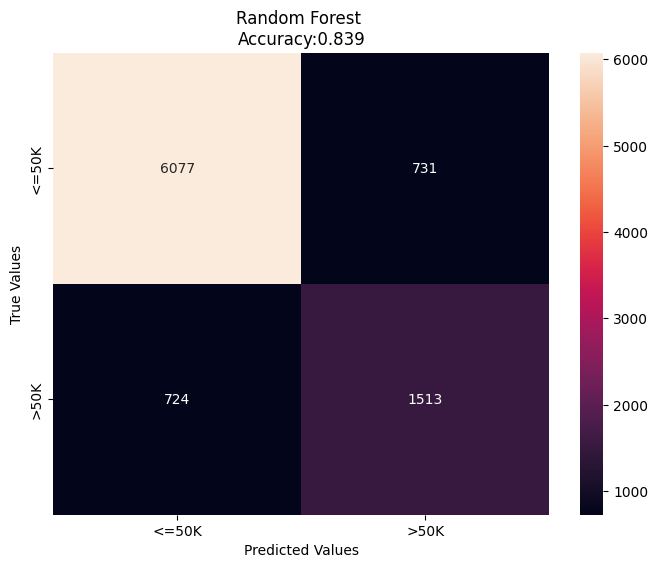

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# กิจกรรม 9.2
# Removes Warnings
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler 

bank = pd.read_csv('bank.csv', sep = ';')
bank.head()

bank = bank.rename(columns={'y': 'Target'})
bank['Target']=bank['Target'].replace({'no': 0, 'yes': 1})
bank.shape
bank.isnull().values.any()
bank.describe()
bank.describe(include=['O'])

bank['Target'].value_counts(0)

bank["job"] = bank["job"].astype('category').cat.codes
bank["marital"] = bank["marital"].astype('category').cat.codes
bank["default"] = bank["job"].astype('category').cat.codes
bank["housing"] = bank["marital"].astype('category').cat.codes
bank["loan"] = bank["loan"].astype('category').cat.codes
bank["contact"] = bank["contact"].astype('category').cat.codes
bank["poutcome"] = bank["poutcome"].astype('category').cat.codes

bank['education']=bank['education'].replace({'primary': 0,'secondary': 1,'tertiary':2})  

bank['month'].replace(['jan', 'feb', 'mar','apr','may','jun','jul','aug',
                       'sep','oct','nov','dec'],
                      [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
bank.head()

target = 'Target'
X = bank.drop(['Target'], axis=1)
y=bank[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,
                                                    random_state=123,stratify=y)

y_train.value_counts()
y_test.value_counts()

standard_scalar = StandardScaler()
X_train_sc = standard_scalar.fit_transform(X_train)
X_test_sc = standard_scalar.transform(X_test)

clf_random = RandomForestClassifier(n_estimators=20,max_depth=None,
                                    min_samples_split=7,random_state=0)

clf_random.fit(X_train_sc,y_train)
y_pred=clf_random.predict(X_test_sc)

target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,index = ['No', 'Yes'],columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

clf_random.fit(X_train_sc_resampled,y_resampled)

y_pred=clf_random.predict(X_test_sc)

target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm, index = ['No', 'Yes'], columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()